In [ ]:
from utils import BasketballDataset, VideoFilePathToTensor, BasketballDatasetTensor, returnWeights
import numpy as np
import json

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import time
import matplotlib.pyplot as plt

import copy
from torch.utils.data import Dataset, DataLoader, Subset

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()
    
    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                print("Train")
            else:
                model.eval()   # Set model to evaluate mode
                print("Val")

            running_loss = 0.0
            running_corrects = 0

            i = 1

            # Iterate over data.
            for sample in dataloaders[phase]:
                inputs = sample["video"]
                labels = sample["action"]
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                       
                    outputs = model(inputs)
                    loss = criterion(outputs, torch.max(labels, 1)[1])
                    
                    _, preds = torch.max(outputs, 1)
                    print(preds)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                    i += 1
                    print(phase," Progress: ", i*12/27201)


                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == torch.max(labels, 1)[1])

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            time_elapsed = time.time() - since
            print(phase, ' training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                val_loss_history.append(epoch_loss)
            if phase == 'train':
                train_acc_history.append(epoch_acc)
                train_loss_history.append(epoch_loss)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history, train_acc_history, val_loss_history, train_loss_history

In [ ]:
with open("dataset/annotation_dict.json") as f:
    annotation_dict = list(json.load(f).items())

In [ ]:
# Defence - "block"
stop = [val for val in annotation_dict if val[1] == 0]
# Passing
ball_pass = [val for val in annotation_dict if val[1] == 1]
# Race or Running
race = [val for val in annotation_dict if val[1] == 2]
# Dribble
pallegio = [val for val in annotation_dict if val[1] == 3]
# Shooting
shooting = [val for val in annotation_dict if val[1] == 4]
# Ball In Hand
ballinhand = [val for val in annotation_dict if val[1] == 5]
# Defensive Position
defence = [val for val in annotation_dict if val[1] == 6]
# Pick Attempt
pick_attempt = [val for val in annotation_dict if val[1] == 7]
# No Action - Just standing
noaction = [val for val in annotation_dict if val[1] == 8]
# walk
walk = [val for val in annotation_dict if val[1] == 9]

In [ ]:
basketball_dataset = BasketballDatasetTensor(annotation_dict="dataset/annotation_dict.json",
                                             poseData=False)

In [11]:
basketball_dataset[99]['action']

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=torch.float64)

In [12]:
basketball_dataset[20]['class']

6

In [48]:
for i in range(0, 1000):
    if basketball_dataset[i]['class'] == 9:
        print(basketball_dataset[i]['action'])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 

In [ ]:
train_dataset_size = len(basketball_dataset)
train_dataset_indices = list(range(train_dataset_size))
np.random.shuffle(train_dataset_indices)
train_idx = train_dataset_indices[:100]
test_idx = train_dataset_indices[100:200]

In [ ]:
train_subset = Subset(basketball_dataset, train_idx)
test_subset = Subset(basketball_dataset, test_idx)

In [24]:
for i in range(0, 50):
    print(train_subset[i]["action"])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0., 0., 0., 

In [ ]:
train_loader = DataLoader(dataset=train_subset, shuffle=False, batch_size=10)
val_loader = DataLoader(dataset=test_subset, shuffle=False, batch_size=10)
dataloaders_dict = {'train': train_loader, 'val': val_loader}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

In [ ]:
# 10 - Number of classes of basketball actions
num_classes = 10
# Batch size for training (change depending on how much memory you have)
batch_size = 12
# Number of epochs to train for
num_epochs = 40

layers = ['layer3','layer4','fc']

In [29]:
# Initialize C3D Model
#model = C3D(num_classes=101, pretrained=True)
model = models.video.r2plus1d_18(pretrained=False, progress=True)

In [30]:
print(model)

VideoResNet(
  (stem): R2Plus1dStem(
    (0): Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
    (1): BatchNorm3d(45, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2Plus1D(
          (0): Conv3d(64, 144, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
          (1): BatchNorm3d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(144, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
        )
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [31]:
# change final fully-connected layer to output 10 classes and input to 184320
for param in model.parameters():
    param.requires_grad = False
    
for name, param in model.named_parameters():
    for layer in layers:
        if layer in name:
            param.requires_grad = True
            
# input of the next hidden layer
num_ftrs = model.fc.in_features
print(num_ftrs)
# New Model is trained with 128x176 images
# Calculation:
model.fc = nn.Linear(num_ftrs, num_classes, bias=True)
   
print(model)

# Put model into device after updating parameters
model = model.to(device)

512
VideoResNet(
  (stem): R2Plus1dStem(
    (0): Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
    (1): BatchNorm3d(45, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
    (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv2Plus1D(
          (0): Conv3d(64, 144, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
          (1): BatchNorm3d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv3d(144, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
        )
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [32]:
params_to_update = model.parameters()
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t", name)

Params to learn:
	 layer3.0.conv1.0.0.weight
	 layer3.0.conv1.0.1.weight
	 layer3.0.conv1.0.1.bias
	 layer3.0.conv1.0.3.weight
	 layer3.0.conv1.1.weight
	 layer3.0.conv1.1.bias
	 layer3.0.conv2.0.0.weight
	 layer3.0.conv2.0.1.weight
	 layer3.0.conv2.0.1.bias
	 layer3.0.conv2.0.3.weight
	 layer3.0.conv2.1.weight
	 layer3.0.conv2.1.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.0.0.weight
	 layer3.1.conv1.0.1.weight
	 layer3.1.conv1.0.1.bias
	 layer3.1.conv1.0.3.weight
	 layer3.1.conv1.1.weight
	 layer3.1.conv1.1.bias
	 layer3.1.conv2.0.0.weight
	 layer3.1.conv2.0.1.weight
	 layer3.1.conv2.0.1.bias
	 layer3.1.conv2.0.3.weight
	 layer3.1.conv2.1.weight
	 layer3.1.conv2.1.bias
	 layer4.0.conv1.0.0.weight
	 layer4.0.conv1.0.1.weight
	 layer4.0.conv1.0.1.bias
	 layer4.0.conv1.0.3.weight
	 layer4.0.conv1.1.weight
	 layer4.0.conv1.1.bias
	 layer4.0.conv2.0.0.weight
	 layer4.0.conv2.0.1.weight
	 layer4.0.conv2.0.1.bias
	 layer4.0

In [58]:
optimizer_ft = optim.Adam(params_to_update, lr=0.01)

#w = returnWeights()
#weights = torch.FloatTensor(w).cuda()
#print(weights)
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model, val_acc_history, train_acc_history, val_loss_history, train_loss_history = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

# Save Model
PATH = "model/small_dataset/"
torch.save(model.state_dict(), PATH + "c3d-basketball-overfit.pth")

Epoch 0/39
----------
Train
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 8, 9, 9, 9, 3, 9, 9, 9, 8], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([9, 9, 9, 3, 9, 9, 9, 9, 9, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
tensor([9, 5, 9, 9, 9, 9, 9, 5, 9, 9], device='cuda:0')
train  Progress:  0.0017646410058453734
tensor([8, 8, 2, 9, 2, 2, 3, 9, 7, 3], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 5, 9, 9, 5], device='cuda:0')
train  Progress:  0.0022058012573067166
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 5, 9, 9, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([9, 9, 2, 9, 9, 9, 9, 9, 9, 9], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([

tensor([2, 3, 2, 2, 6, 0, 9, 9, 2, 2], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 2, 9], device='cuda:0')
val  Progress:  0.0017646410058453734
tensor([9, 9, 9, 9, 3, 3, 8, 6, 9, 3], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9], device='cuda:0')
val  Progress:  0.0022058012573067166
tensor([3, 9, 8, 9, 8, 4, 8, 3, 9, 2], device='cuda:0')
tensor([2, 9, 9, 9, 2, 9, 2, 2, 2, 9], device='cuda:0')
val  Progress:  0.00264696150876806
tensor([6, 8, 9, 9, 1, 9, 3, 1, 9, 8], device='cuda:0')
tensor([2, 9, 9, 9, 9, 9, 9, 9, 5, 9], device='cuda:0')
val  Progress:  0.0030881217602294034
tensor([6, 9, 8, 0, 9, 8, 9, 5, 8, 3], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 2, 2], device='cuda:0')
val  Progress:  0.003529282011690747
tensor([9, 5, 3, 9, 2, 6, 9, 9, 8, 6], device='cuda:0')
tensor([9, 9, 9, 9, 9, 2, 9, 9, 9, 9], device='cuda:0')
val  Progress:  0.00397044226315209
tensor([8, 3, 9, 9, 4, 8, 9, 0, 8, 9], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 2, 9], device='cu

tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 2, 9, 2, 3, 9, 3, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([9, 9, 2, 9, 9, 2, 9, 9, 9, 2], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([9, 2, 9, 2, 9, 9, 9, 9, 3, 2], device='cuda:0')
train  Progress:  0.003529282011690747
tensor([8, 8, 9, 1, 2, 6, 8, 6, 6, 0], device='cuda:0')
tensor([9, 9, 9, 3, 2, 2, 9, 2, 3, 3], device='cuda:0')
train  Progress:  0.00397044226315209
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
tensor([2, 2, 2, 2, 2, 3, 9, 2, 9, 9], device='cuda:0')
train  Progress:  0.004411602514613433
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
tensor([9, 2, 9, 9, 2, 2, 2, 9, 5, 9], device='cuda:0')
train  Progress:  0.004852762766074777
train  training complete in 0m 44s
train Loss: 0.9889 Acc: 0.6200
Val
tensor([3, 8, 8, 8, 6, 8,

tensor([6, 9, 8, 0, 9, 8, 9, 5, 8, 3], device='cuda:0')
tensor([9, 2, 2, 2, 3, 9, 9, 9, 2, 2], device='cuda:0')
val  Progress:  0.003529282011690747
tensor([9, 5, 3, 9, 2, 6, 9, 9, 8, 6], device='cuda:0')
tensor([9, 3, 2, 9, 9, 5, 9, 9, 9, 2], device='cuda:0')
val  Progress:  0.00397044226315209
tensor([8, 3, 9, 9, 4, 8, 9, 0, 8, 9], device='cuda:0')
tensor([9, 2, 2, 2, 9, 9, 9, 2, 2, 2], device='cuda:0')
val  Progress:  0.004411602514613433
tensor([8, 8, 3, 2, 2, 8, 9, 4, 0, 9], device='cuda:0')
tensor([2, 9, 8, 2, 2, 9, 9, 2, 9, 9], device='cuda:0')
val  Progress:  0.004852762766074777
val  training complete in 1m 3s
val Loss: 4.3219 Acc: 0.3200
Epoch 8/39
----------
Train
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 9, 9, 9, 9, 5, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([2, 8, 9, 3, 9, 2, 2, 5, 2, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3, 

tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
tensor([3, 2, 3, 2, 2, 3, 8, 2, 9, 8], device='cuda:0')
train  Progress:  0.004411602514613433
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
tensor([9, 2, 9, 9, 2, 2, 2, 8, 5, 9], device='cuda:0')
train  Progress:  0.004852762766074777
train  training complete in 1m 23s
train Loss: 0.4953 Acc: 0.8400
Val
tensor([3, 8, 8, 8, 6, 8, 3, 9, 5, 2], device='cuda:0')
tensor([5, 8, 8, 9, 2, 2, 2, 9, 8, 6], device='cuda:0')
val  Progress:  0.0008823205029226867
tensor([9, 4, 6, 2, 6, 2, 9, 9, 2, 8], device='cuda:0')
tensor([9, 9, 9, 6, 6, 6, 6, 9, 9, 9], device='cuda:0')
val  Progress:  0.00132348075438403
tensor([2, 3, 2, 2, 6, 0, 9, 9, 2, 2], device='cuda:0')
tensor([8, 6, 8, 2, 2, 9, 9, 6, 6, 2], device='cuda:0')
val  Progress:  0.0017646410058453734
tensor([9, 9, 9, 9, 3, 3, 8, 6, 9, 3], device='cuda:0')
tensor([8, 9, 2, 8, 9, 6, 8, 6, 9, 2], device='cuda:0')
val  Progress:  0.0022058012573067166
tensor([3, 9, 8, 9, 8, 4, 8, 3

tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([2, 9, 9, 0, 9, 2, 2, 5, 2, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
train  Progress:  0.0017646410058453734
tensor([8, 8, 2, 9, 2, 2, 3, 9, 7, 3], device='cuda:0')
tensor([8, 8, 2, 9, 2, 2, 3, 9, 5, 3], device='cuda:0')
train  Progress:  0.0022058012573067166
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([2, 9, 2, 9, 9, 2, 2, 9, 9, 8], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6

tensor([2, 3, 2, 2, 6, 0, 9, 9, 2, 2], device='cuda:0')
tensor([9, 6, 8, 2, 5, 2, 2, 2, 5, 2], device='cuda:0')
val  Progress:  0.0017646410058453734
tensor([9, 9, 9, 9, 3, 3, 8, 6, 9, 3], device='cuda:0')
tensor([9, 2, 2, 9, 2, 6, 8, 2, 9, 2], device='cuda:0')
val  Progress:  0.0022058012573067166
tensor([3, 9, 8, 9, 8, 4, 8, 3, 9, 2], device='cuda:0')
tensor([2, 6, 9, 2, 2, 9, 2, 3, 2, 9], device='cuda:0')
val  Progress:  0.00264696150876806
tensor([6, 8, 9, 9, 1, 9, 3, 1, 9, 8], device='cuda:0')
tensor([3, 2, 9, 8, 2, 9, 2, 2, 7, 8], device='cuda:0')
val  Progress:  0.0030881217602294034
tensor([6, 9, 8, 0, 9, 8, 9, 5, 8, 3], device='cuda:0')
tensor([9, 9, 2, 7, 2, 9, 2, 9, 2, 2], device='cuda:0')
val  Progress:  0.003529282011690747
tensor([9, 5, 3, 9, 2, 6, 9, 9, 8, 6], device='cuda:0')
tensor([9, 6, 2, 8, 9, 5, 9, 8, 9, 2], device='cuda:0')
val  Progress:  0.00397044226315209
tensor([8, 3, 9, 9, 4, 8, 9, 0, 8, 9], device='cuda:0')
tensor([9, 7, 2, 2, 2, 9, 9, 7, 2, 9], device='cu

tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
train  Progress:  0.003529282011690747
tensor([8, 8, 9, 1, 2, 6, 8, 6, 6, 0], device='cuda:0')
tensor([8, 8, 9, 1, 2, 6, 8, 6, 6, 0], device='cuda:0')
train  Progress:  0.00397044226315209
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
train  Progress:  0.004411602514613433
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
train  Progress:  0.004852762766074777
train  training complete in 2m 25s
train Loss: 0.0144 Acc: 1.0000
Val
tensor([3, 8, 8, 8, 6, 8,

tensor([6, 9, 8, 0, 9, 8, 9, 5, 8, 3], device='cuda:0')
tensor([9, 9, 2, 9, 2, 9, 8, 8, 0, 2], device='cuda:0')
val  Progress:  0.003529282011690747
tensor([9, 5, 3, 9, 2, 6, 9, 9, 8, 6], device='cuda:0')
tensor([9, 2, 2, 8, 9, 2, 9, 8, 8, 9], device='cuda:0')
val  Progress:  0.00397044226315209
tensor([8, 3, 9, 9, 4, 8, 9, 0, 8, 9], device='cuda:0')
tensor([9, 2, 2, 9, 9, 9, 9, 9, 9, 9], device='cuda:0')
val  Progress:  0.004411602514613433
tensor([8, 8, 3, 2, 2, 8, 9, 4, 0, 9], device='cuda:0')
tensor([9, 9, 9, 7, 2, 9, 9, 2, 9, 9], device='cuda:0')
val  Progress:  0.004852762766074777
val  training complete in 2m 44s
val Loss: 6.7325 Acc: 0.3000
Epoch 21/39
----------
Train
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3

tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
train  Progress:  0.004411602514613433
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
train  Progress:  0.004852762766074777
train  training complete in 3m 4s
train Loss: 0.0022 Acc: 1.0000
Val
tensor([3, 8, 8, 8, 6, 8, 3, 9, 5, 2], device='cuda:0')
tensor([5, 8, 8, 0, 2, 2, 2, 0, 9, 2], device='cuda:0')
val  Progress:  0.0008823205029226867
tensor([9, 4, 6, 2, 6, 2, 9, 9, 2, 8], device='cuda:0')
tensor([9, 2, 2, 2, 9, 2, 2, 9, 9, 9], device='cuda:0')
val  Progress:  0.00132348075438403
tensor([2, 3, 2, 2, 6, 0, 9, 9, 2, 2], device='cuda:0')
tensor([8, 6, 8, 2, 2, 9, 9, 2, 3, 2], device='cuda:0')
val  Progress:  0.0017646410058453734
tensor([9, 9, 9, 9, 3, 3, 8, 6, 9, 3], device='cuda:0')
tensor([9, 9, 2, 9, 9, 2, 9, 2, 9, 2], device='cuda:0')
val  Progress:  0.0022058012573067166
tensor([3, 9, 8, 9, 8, 4, 8, 3,

tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
train  Progress:  0.0017646410058453734
tensor([8, 8, 2, 9, 2, 2, 3, 9, 7, 3], device='cuda:0')
tensor([8, 8, 2, 9, 2, 2, 3, 9, 7, 3], device='cuda:0')
train  Progress:  0.0022058012573067166
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6

tensor([2, 3, 2, 2, 6, 0, 9, 9, 2, 2], device='cuda:0')
tensor([8, 6, 8, 2, 2, 9, 9, 2, 3, 2], device='cuda:0')
val  Progress:  0.0017646410058453734
tensor([9, 9, 9, 9, 3, 3, 8, 6, 9, 3], device='cuda:0')
tensor([9, 9, 2, 9, 9, 2, 9, 2, 9, 2], device='cuda:0')
val  Progress:  0.0022058012573067166
tensor([3, 9, 8, 9, 8, 4, 8, 3, 9, 2], device='cuda:0')
tensor([2, 6, 9, 2, 5, 2, 2, 3, 0, 9], device='cuda:0')
val  Progress:  0.00264696150876806
tensor([6, 8, 9, 9, 1, 9, 3, 1, 9, 8], device='cuda:0')
tensor([3, 2, 9, 9, 2, 9, 2, 2, 9, 8], device='cuda:0')
val  Progress:  0.0030881217602294034
tensor([6, 9, 8, 0, 9, 8, 9, 5, 8, 3], device='cuda:0')
tensor([9, 9, 2, 9, 5, 9, 8, 8, 0, 2], device='cuda:0')
val  Progress:  0.003529282011690747
tensor([9, 5, 3, 9, 2, 6, 9, 9, 8, 6], device='cuda:0')
tensor([9, 2, 2, 8, 9, 2, 9, 8, 8, 9], device='cuda:0')
val  Progress:  0.00397044226315209
tensor([8, 3, 9, 9, 4, 8, 9, 0, 8, 9], device='cuda:0')
tensor([9, 2, 2, 9, 9, 9, 9, 9, 2, 9], device='cu

tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
train  Progress:  0.003529282011690747
tensor([8, 8, 9, 1, 2, 6, 8, 6, 6, 0], device='cuda:0')
tensor([8, 8, 9, 1, 2, 6, 8, 6, 6, 0], device='cuda:0')
train  Progress:  0.00397044226315209
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
train  Progress:  0.004411602514613433
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
train  Progress:  0.004852762766074777
train  training complete in 4m 8s
train Loss: 0.0008 Acc: 1.0000
Val
tensor([3, 8, 8, 8, 6, 8, 

tensor([6, 9, 8, 0, 9, 8, 9, 5, 8, 3], device='cuda:0')
tensor([9, 9, 2, 9, 5, 9, 8, 8, 0, 2], device='cuda:0')
val  Progress:  0.003529282011690747
tensor([9, 5, 3, 9, 2, 6, 9, 9, 8, 6], device='cuda:0')
tensor([9, 2, 2, 8, 9, 2, 9, 8, 8, 9], device='cuda:0')
val  Progress:  0.00397044226315209
tensor([8, 3, 9, 9, 4, 8, 9, 0, 8, 9], device='cuda:0')
tensor([9, 2, 2, 9, 9, 9, 9, 9, 2, 9], device='cuda:0')
val  Progress:  0.004411602514613433
tensor([8, 8, 3, 2, 2, 8, 9, 4, 0, 9], device='cuda:0')
tensor([9, 9, 9, 7, 2, 9, 9, 2, 9, 9], device='cuda:0')
val  Progress:  0.004852762766074777
val  training complete in 4m 27s
val Loss: 7.2567 Acc: 0.3100
Epoch 34/39
----------
Train
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3

tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
tensor([3, 2, 5, 0, 2, 3, 8, 2, 9, 8], device='cuda:0')
train  Progress:  0.004411602514613433
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
tensor([9, 2, 9, 9, 2, 7, 6, 8, 5, 9], device='cuda:0')
train  Progress:  0.004852762766074777
train  training complete in 4m 48s
train Loss: 0.0005 Acc: 1.0000
Val
tensor([3, 8, 8, 8, 6, 8, 3, 9, 5, 2], device='cuda:0')
tensor([5, 8, 8, 0, 2, 2, 2, 0, 9, 2], device='cuda:0')
val  Progress:  0.0008823205029226867
tensor([9, 4, 6, 2, 6, 2, 9, 9, 2, 8], device='cuda:0')
tensor([9, 2, 2, 2, 6, 2, 2, 9, 9, 9], device='cuda:0')
val  Progress:  0.00132348075438403
tensor([2, 3, 2, 2, 6, 0, 9, 9, 2, 2], device='cuda:0')
tensor([8, 6, 8, 2, 2, 9, 9, 2, 3, 2], device='cuda:0')
val  Progress:  0.0017646410058453734
tensor([9, 9, 9, 9, 3, 3, 8, 6, 9, 3], device='cuda:0')
tensor([9, 9, 2, 9, 9, 2, 9, 2, 9, 2], device='cuda:0')
val  Progress:  0.0022058012573067166
tensor([3, 9, 8, 9, 8, 4, 8, 3

tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
tensor([9, 9, 9, 8, 9, 5, 2, 9, 9, 9], device='cuda:0')
train  Progress:  0.0008823205029226867
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
tensor([2, 9, 9, 5, 9, 2, 2, 5, 2, 9], device='cuda:0')
train  Progress:  0.00132348075438403
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
tensor([8, 3, 9, 9, 8, 9, 9, 5, 2, 9], device='cuda:0')
train  Progress:  0.0017646410058453734
tensor([8, 8, 2, 9, 2, 2, 3, 9, 7, 3], device='cuda:0')
tensor([8, 8, 2, 9, 2, 2, 3, 9, 7, 3], device='cuda:0')
train  Progress:  0.0022058012573067166
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
tensor([9, 9, 9, 2, 9, 2, 3, 8, 3, 9], device='cuda:0')
train  Progress:  0.00264696150876806
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
tensor([8, 9, 2, 9, 9, 2, 9, 9, 9, 8], device='cuda:0')
train  Progress:  0.0030881217602294034
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6], device='cuda:0')
tensor([8, 6, 8, 3, 8, 8, 9, 9, 6, 6

In [59]:
print("Best Validation Loss: ", min(val_loss_history), "Epoch: ", val_loss_history.index(min(val_loss_history)))
print("Best Training Loss: ", min(train_loss_history), "Epoch: ", train_loss_history.index(min(train_loss_history)))

Best Validation Loss:  2.50142183303833 Epoch:  3
Best Training Loss:  0.0004028550858492963 Epoch:  39


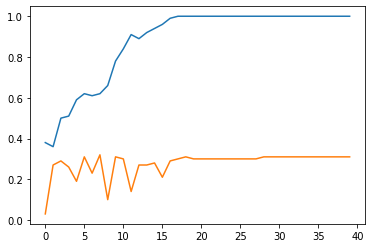

In [60]:
plt.plot(train_acc_history)
plt.plot(val_acc_history)

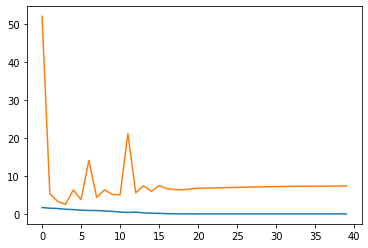

In [61]:
plt.plot(train_loss_history)
plt.plot(val_loss_history)